# Análisis la actividad policial con pandas

¡Ahora que ha aprendido los fundamentos de los pandas, este curso le dará la oportunidad de aplicar ese conocimiento respondiendo preguntas interesantes sobre un conjunto de datos real! Explorará el conjunto de datos de Stanford Open Policing Project y analizará el impacto del género en el comportamiento policial.

Durante el curso, obtendrá más práctica limpiando datos desordenados, creando visualizaciones, combinando y reformando conjuntos de datos y manipulando datos de series temporales.

Analizar la actividad policial con los pandas te dará una experiencia valiosa analizando un conjunto de datos de principio a fin, ¡preparándote para tu carrera de ciencia de datos!

    1.Preparando los datos para el análisis (convirtiendo las columnas en tipos de datos adecuados)
    2.Explorando la relacion de genero y policias (Creación de tablas para contestar preguntas generales a particulares)
    3.Visualización de los datos (gráficas con datos o resumenes de datos que son mejor ver)
    4.Analisando la actividad dependiendo del clima (cruze de datos del clima con los datos de la policia con la llave de fecha)
    

### Preparando los datos para el análisis

In [102]:
import pandas as pd

police = pd.read_csv('https://assets.datacamp.com/production/repositories/1497/datasets/62bd9feef451860db02d26553613a299721882e8/police.csv')

weather = pd.read_csv('https://assets.datacamp.com/production/repositories/1497/datasets/02f3fb2d4416d3f6626e1117688e0386784e8e55/weather.csv')

In [103]:
police.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [104]:
police.shape

(91741, 15)

In [105]:
#datos del clima
weather.head()

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN


In [106]:
weather.shape

(4017, 27)

In [107]:
#Hagamos un conteo de valores nulos
police.isnull().sum()

#Eliminamos county_name ya que solo tiene columnas nulas

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [108]:
#De igual forma state solo tiene valores de RI (Rhode Island)
police.state.value_counts()

RI    91741
Name: state, dtype: int64

In [109]:
police.drop(['county_name', 'state'], axis='columns', inplace=True)
police.shape

(91741, 13)

In [110]:
#Tenemos 5205 sin datos eliminaremos las filas faltantes de la columna driver_gender
print(police.isnull().sum())

stop_date                 0
stop_time                 0
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64


In [111]:
#ejemplo de datos faltantes fila 15
police.loc[15:16,:]

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
15,2005-09-03,16:02,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone K3
16,2005-09-11,00:10,M,White,Other Traffic Violation,Moving violation,False,NaN,Arrest Driver,True,30+ Min,False,Zone X4


In [112]:
#Tenemos 5205 filas faltantes eliminaremos las filas faltantes de la columna driver_gender
police.dropna(subset=['driver_gender'], inplace=True)
police.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64

In [113]:
police.shape

(86536, 13)

Hemos reducido considerablemente la base de datos, detectando los valores faltantes.

Veamos los tipos de datos, para ver si necesitamos ajustar algo antes de comenzar a visualizar.

In [114]:
police.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

La mayoría de nuestros datos son de tipo object, en ocasiones es más sencillo tratar con datos booleanos, datatime, enteros, flotantes.

In [115]:
#Tipos de datos adecuados 
print(police.is_arrested.value_counts())

#Convertiremos is_arrested en booleano
police.is_arrested = police.is_arrested.astype('bool')
police.is_arrested.dtypes


False    83458
True      3078
Name: is_arrested, dtype: int64


dtype('bool')

In [116]:
#Trabajando con fechas, es mejor tener un formato de fechas adecuado

police.loc[:,['stop_date','stop_time']].dtypes

print(police.stop_date.value_counts().head())
print(police.stop_time.value_counts().head())


2007-05-16    63
2011-09-03    60
2006-01-09    59
2007-01-04    57
2005-11-04    56
Name: stop_date, dtype: int64
11:00    339
10:00    313
10:30    275
09:30    269
14:00    254
Name: stop_time, dtype: int64


In [117]:
#Combinaremos las columnas stop_date y stop_time para luego convertir en formato datetime
combined = police.stop_date.str.cat(police.stop_time, sep=' ')

combined.head()

0    2005-01-04 12:55
1    2005-01-23 23:15
2    2005-02-17 04:15
3    2005-02-20 17:15
4    2005-02-24 01:20
Name: stop_date, dtype: object

In [118]:
police['stop_datetime'] = pd.to_datetime(combined)

#convirtiendo driver gender en categorica
police['driver_gender'] = police['driver_gender'].astype('category')
police.dtypes

stop_date                     object
stop_time                     object
driver_gender               category
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object

In [119]:
#Tendremos como nombre de filas la columna stop_datetime
police.set_index('stop_datetime', inplace = True)
police.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


Hemos preparado los datos para comenzar a hacer resumenes sobre los datos.

### Examinación jerarquica de los datos, exploración.

Antes de comenzar con preguntas puntuales de los datos, es una buena práctica comenzar con los resumens más generales.

Comenzaremos Examinando las infracciones de tránsito.

In [120]:
#Conteo de violaciones de transito
police.violation.value_counts()

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64

In [121]:
#Porcentaje
police.violation.value_counts(normalize = True)

Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64

La mayoría de las infracciones suceden por exceso de velocidad

#### ¿Como se distribuyen las violaciones por sexo?

In [122]:
pd.pivot_table(police, index='violation', columns = 'driver_gender', aggfunc='count', fill_value=0)['violation_raw']

driver_gender,F,M
violation,,
Equipment,2501,8420
Moving violation,3286,12938
Other,707,3702
Registration/plates,1056,2647
Seat belt,578,2278
Speeding,15646,32777


In [123]:
#Porcentaje de violaciones para cada sexo
male = police[police.driver_gender == 'M']
female = police[police.driver_gender == 'F']

print(male.violation.value_counts(normalize = True))
print(female.violation.value_counts(normalize = True))

Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64
Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64


Alrededor de dos tercios de las paradas de tráfico femenino son para acelerar, mientras que las paradas de los hombres están más equilibradas entre las seis categorías.

Sin embargo, esto no significa que las mujeres aceleren más a menudo que los hombres,
ya que no tomamos en cuenta la cantidad de paradas o conductores.

#### ¿El género afecta a quién recibe una multa por exceso de velocidad?

In [124]:
female_and_speeding = police[(police.driver_gender == 'F') & (police.violation == 'Speeding')]

male_and_speeding = police[(police.driver_gender == 'M') & (police.violation == 'Speeding')]

print(female_and_speeding.stop_outcome.value_counts(normalize=True))

print(male_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64
Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64


¡Interesante! Los números son similares para hombres y mujeres: alrededor del 95% de las paradas por exceso de velocidad resultan en una multa.

Por lo tanto, los datos no muestran que el género tiene un impacto en quién recibe una multa por exceso de velocidad.

#### ¿El género afecta a quién se les raliza una busqueda para ver infracciones?

Durante una parada de tráfico, el oficial de policía a veces realiza una búsqueda del vehículo.

En este ejercicio, calculará el porcentaje de todas las paradas que resultan en una búsqueda de vehículo,también conocida como la tasa de búsqueda.

In [125]:
police.search_conducted.value_counts(normalize = True)


False    0.961785
True     0.038215
Name: search_conducted, dtype: float64

In [126]:
police.search_conducted.mean()

0.0382153092354627

¡Excelente! Parece que la tasa de búsqueda es de aproximadamente 3.8%.

A continuación, examinará si la tasa de búsqueda varía según el género del conductor.

Comparará las tasas a las que se busca a los conductores femeninos y masculinos durante una parada de tráfico. 

Recuerde que la tasa de búsqueda de vehículos en todas las paradas es de aproximadamente 3.8%.

In [127]:
print(police.groupby('driver_gender').search_conducted.mean())

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64


¡Guauu! Los conductores masculinos son buscados más del doble de veces que los conductores femeninos.

#### ¿Por qué podría ser esto?

In [128]:
print(police.groupby(['driver_gender', 'violation']).search_conducted.mean())

driver_gender  violation          
F              Equipment              0.039984
               Moving violation       0.039257
               Other                  0.041018
               Registration/plates    0.054924
               Seat belt              0.017301
               Speeding               0.008309
M              Equipment              0.071496
               Moving violation       0.061524
               Other                  0.046191
               Registration/plates    0.108802
               Seat belt              0.035119
               Speeding               0.027885
Name: search_conducted, dtype: float64


¡Buen trabajo! Para todos los tipos de violaciones, la tasa de búsqueda es más alta para hombres que para mujeres, lo que refuta nuestra hipótesis.

Durante la búsqueda de un vehículo, el oficial de policía puede golpear al conductor para verificar si tiene un arma.

Esto se conoce como un "registro protector".

En este ejercicio, primero verificará cuántas veces "Protective Frisk" fue el único tipo de búsqueda.

Luego, usará un método de cadena para localizar todas las instancias en las que se registró el controlador.

In [129]:
print(police.search_type.value_counts())
#Creacion de una columna que nos ayude a detectar frisk rápidamente
police['frisk'] = police.search_type.str.contains('Protective Frisk', na=False)
print(police.frisk.dtype)
print(police.frisk.sum())

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Probable Cause,Protective Frisk                               35
Incident to Arrest,Inventory,Probable Cause                   35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

¡Buen trabajo! Parece que hubo 303 conductores que fueron cacheados.

A continuación, examinará si el género afecta a quién se registra

Comparación de tasas de registro por género

#### ¿Se registran los hombres con más frecuencia que las mujeres, tal vez porque los policías los consideran de mayor riesgo?

In [130]:
searched = police[police.search_conducted == True]
print(searched.frisk.mean())

# Calculate the frisk rate for each gender
print(searched.groupby('driver_gender').frisk.mean())

0.09162382824312065
driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64


¡Interesante! La tasa de registro es más alta para los hombres que para las mujeres, aunque no podemos concluir que esta diferencia sea causada por el género del conductor.

En resumen hemos analisado que los tipos de violaciones más comunes, son por exceso de velocidad. El sexo no afecta para recibir una multa por exceso de velocidad pero si afecta al momento de hacer una busqueda sobre el vehículo y rastreo de armas de fuego.

### Visualización de los datos

Análisis exploratorio visual

#### ¿La hora del día afecta la tasa de arresto?

In [131]:
print(police.is_arrested.mean())

0.0355690117407784


In [132]:
print(police.groupby(police.index.hour).is_arrested.mean())

stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64


es mejor ver los datos de forma grafica para detectar los picos de arresto

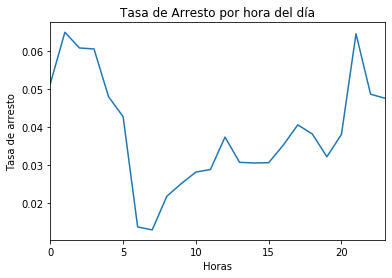

In [133]:
hourly_arrest_rate = police.groupby(police.index.hour).is_arrested.mean()

import matplotlib.pyplot as plt

hourly_arrest_rate.plot()

# grafica
plt.xlabel('Horas')
plt.ylabel('Tasa de arresto')
plt.title('Tasa de Arresto por hora del día')
plt.show()

¡Guauu! La tasa de arrestos tiene un pico significativo durante la noche, y luego cae en las primeras horas de la mañana.

#### ¿Están aumentando las paradas relacionadas con las drogas?

stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


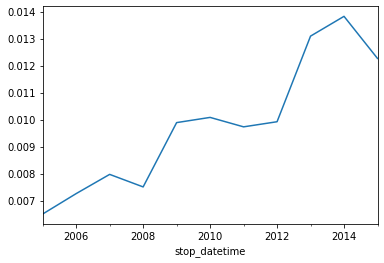

In [134]:
#calculo anual resample('A') toma como referencia el index datatime
print(police.drugs_related_stop.resample('A').mean())

annual_drug_rate = police.drugs_related_stop.resample('A').mean()
annual_drug_rate.plot()

Cada año se a elevado la búsqueda por drogas.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f94dda3fa90>,
      dtype=object)

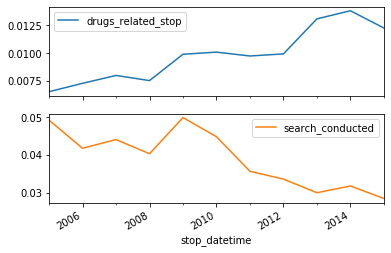

In [135]:
#Comparación de drogas y tasas de búsqueda de drogas

#Calculo por busquedas
annual_search_rate = police.search_conducted.resample('A').mean()

# Concatenación 'annual_drug_rate' y 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

annual.plot(subplots=True)

¡Guauu! La tasa de paradas relacionadas con las drogas aumentó a pesar de que la tasa de búsqueda disminuyó, refutando nuestra hipótesis.

#### ¿Qué infracciones se detectan en cada distrito?

In [137]:
# tabla violaciones por distrito
pd.crosstab(police.district, police.violation)

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,672,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,705,695,638,12322
Zone X1,296,671,143,38,74,1119
Zone X3,2049,3086,769,671,820,8779
Zone X4,3541,5353,1560,1411,843,9795


In [139]:
# filtro de algunas zonas
all_zones = pd.crosstab(police.district, police.violation)

all_zones.loc['Zone K1':'Zone K3']


violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,672,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,705,695,638,12322


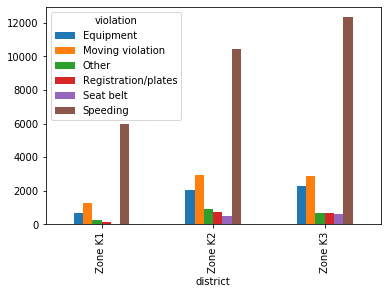

In [143]:
k_zones = all_zones.loc['Zone K1':'Zone K3']

k_zones.plot(kind='bar')

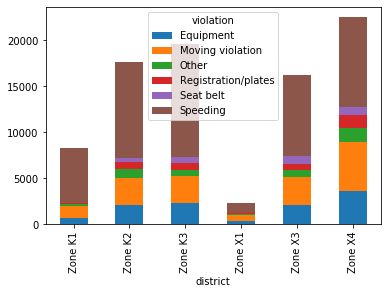

In [144]:
# Create a stacked bar plot of 'k_zones'
all_zones.plot(kind='bar', stacked=True)

¡Interesante! La gran mayoría de las paradas de tráfico en la Zona K1 son por exceso de velocidad, y las Zonas K2 y K3 son notablemente similares entre sí en términos de violaciones.

#### ¿Cuánto tiempo podría ser detenido por una violación?

In [145]:
# imprimiendo valores unicos de 'stop_duration'
print(police.stop_duration.unique())

# Creando el diccionario con los valores promedios
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}

# remplazando valores de 'stop_duration' con los valores de mapping'mapping'
police['stop_minutes'] = police.stop_duration.map(mapping)

print(police.stop_minutes.unique())

['0-15 Min' '16-30 Min' '30+ Min']
[ 8 23 45]


¡Excelente! A continuación, analizará la duración de la detención para cada tipo de infracción.

Visualizará el tiempo promedio que los conductores están detenidos por cada tipo de violación. 

En lugar de usar la violation columna en este ejercicio, la usará violation_rawya que contiene descripciones más detalladas de las violaciones.

violation_raw
APB                                 17.967033
Call for Service                    22.124371
Equipment/Inspection Violation      11.445655
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581562
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


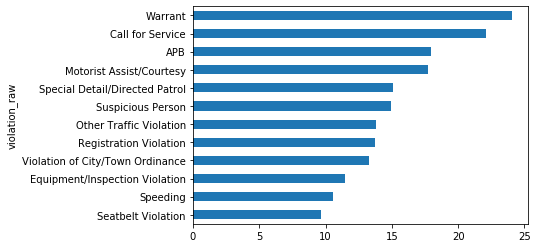

In [146]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(police.groupby('violation_raw').stop_minutes.mean())

# Save the resulting Series as 'stop_length'
stop_length = police.groupby('violation_raw').stop_minutes.mean()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh')

### Analisando la actividad dependiendo del clima

En este ejercicio, examinará las columnas de temperatura del conjunto de datos meteorológicos para evaluar si los datos parecen confiables.

Primero imprimirá las estadísticas de resumen, y luego visualizará los datos usando un diagrama de caja.

¡Al decidir si los valores parecen razonables, tenga en cuenta que la temperatura se mide en grados Fahrenheit, no en grados Celsius!

              TMIN         TAVG         TMAX
count  4017.000000  1217.000000  4017.000000
mean     43.484441    52.493016    61.268608
std      17.020298    17.830714    18.199517
min      -5.000000     6.000000    15.000000
25%      30.000000    39.000000    47.000000
50%      44.000000    54.000000    62.000000
75%      58.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000


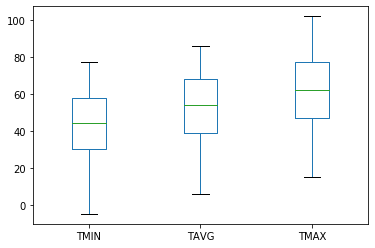

In [74]:
weather.head()

print(weather[['TMIN', 'TAVG', 'TMAX']].describe())

# Create a box plot of the temperature columns
weather[['TMIN', 'TAVG', 'TMAX']].plot(kind='box')


count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64


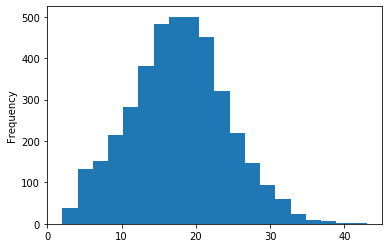

In [75]:
#Create a 'TDIFF' column that represents temperature difference
weather['TDIFF'] = weather.TMAX - weather.TMIN

# Describe the 'TDIFF' column
print(weather.TDIFF.describe())

# Create a histogram with 20 bins to visualize 'TDIFF'
weather.TDIFF.plot(kind='hist', bins=20)

El weatherDataFrame contiene 20 columnas que comienzan con 'WT', cada una de las cuales representa una mala condición climática. Por ejemplo:

    WT05 indica "granizo"
    
    WT11 indica "vientos fuertes o dañinos"
    
    WT17 indica "lluvia helada"

Para cada fila de la base de datos, cada WTcolumna contiene o bien un 1(es decir, la condición estaba presente ese día) o NaN(es decir, la condición no estaba presente).


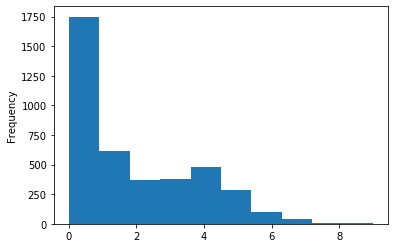

In [76]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:, 'WT01':'WT22']

# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis='columns')

# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize 'bad_conditions'
weather.bad_conditions.plot(kind='hist')

¡Excelente trabajo! Parece que muchos días no tuvieron condiciones climáticas adversas, y solo una pequeña parte de los días tuvo 

más de cuatro condiciones climáticas adversas.

#### Calificación de las condiciones climáticas

In [77]:
# Count the unique values in 'bad_conditions' and sort the index
print(weather.bad_conditions.value_counts().sort_index())

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64


In [78]:
# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# Count the unique values in 'rating'
print(weather.rating.value_counts())

bad      1836
good     1749
worse     432
Name: rating, dtype: int64


¡Buen trabajo! Este sistema de clasificación debería facilitar la comprensión de los datos de las condiciones climáticas.

Cambiar el tipo de datos a categoría

Dado que la rating columna solo tiene algunos valores posibles, cambiará su tipo de datos a categoría para almacenar los datos de manera más eficiente. También especificará un orden lógico para las categorías, que será útil para futuros ejercicios.

In [79]:
# Create a list of weather ratings in logical order
cats = ['good', 'bad', 'worse']

# Change the data type of 'rating' to category
weather['rating'] = weather.rating.astype('category', ordered=True, categories=cats)

# Examine the head of 'rating'
print(weather.rating.head())


0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): [good < bad < worse]


/home/carlos/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3325: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


Preparando los datos para unirlos

In [81]:
# Reset the index of 'ri'
police.reset_index(inplace=True)

# Examine the head of 'ri'
police.head()

,index,stop_datetime,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,frisk,stop_minutes
0,0,2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8
1,1,2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False,8
2,2,2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8
3,3,2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,False,23
4,4,2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,False,8


In [82]:
# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather[['DATE', 'rating']]

# Examine the head of 'weather_rating'
weather_rating.head()

,DATE,rating
0,2005-01-01,bad
1,2005-01-02,bad
2,2005-01-03,bad
3,2005-01-04,bad
4,2005-01-05,bad


In [83]:
# Examine the shape of 'ri'
print(police.shape)

(86536, 17)


In [84]:
# Merge 'ri' and 'weather_rating' using a left join
police_weather = pd.merge(left=police, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

# Examine the shape of 'ri_weather'
print(police_weather.shape)

(86536, 19)


In [85]:
# Set 'stop_datetime' as the index of 'ri_weather'
police_weather.set_index('stop_datetime', inplace=True)

¡Fantástico! En la siguiente sección, usará ri_weatherpara analizar la relación entre las condiciones climáticas y el comportamiento policial.

#### ¿El clima afecta la tasa de arresto?

In [87]:
print(police_weather.is_arrested.mean())

0.0355690117407784


In [88]:
print(police_weather.groupby('rating').is_arrested.mean())

rating
good     0.033715
bad      0.036261
worse    0.041667
Name: is_arrested, dtype: float64


In [89]:
print(police_weather.groupby(['violation', 'rating']).is_arrested.mean())

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64


¡Guauu! La tasa de arrestos aumenta a medida que el clima empeora, y esa tendencia persiste en muchos de los tipos de violación. 

Esto no prueba un vínculo causal, ¡pero es un resultado bastante interesante!


In [90]:
# Save the output of the groupby operation from the last exercise
arrest_rate = police_weather.groupby(['violation', 'rating']).is_arrested.mean()

# Print the 'arrest_rate' Series
print(arrest_rate)

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64


In [92]:
# Print the arrest rate for moving violations in bad weather
print(arrest_rate.loc['Moving violation', 'bad'])

0.05804964058049641


In [93]:
# Print the arrest rates for speeding violations in all three weather conditions
print(arrest_rate.loc['Speeding'])

rating
good     0.013405
bad      0.013314
worse    0.016886
Name: is_arrested, dtype: float64


In [94]:
# Unstack the 'arrest_rate' Series into a DataFrame
print(arrest_rate.unstack())

rating                   good       bad     worse
violation                                        
Equipment            0.059007  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076966  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013405  0.013314  0.016886


In [95]:
# Create the same DataFrame using a pivot table
print(police_weather.pivot_table(index='violation', columns='rating', values='is_arrested'))

rating                   good       bad     worse
violation                                        
Equipment            0.059007  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076966  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013405  0.013314  0.016886
